<table style="width:100%; border: 0px solid black;">
    <tr style="width: 100%; border: 0px solid black;">
        <td style="width:75%; border: 0px solid black;">
            <a href="http://www.drivendata.org">
                <img src="https://s3.amazonaws.com/drivendata.org/kif-example/img/dd.png" />
            </a>
        </td>
        <td style="width:20%; border: 0px solid black;">
            <strong>Peter Bull</strong> <br>
            <strong>Data Scientist</strong> <br>
            <a target=_blank href="http://www.drivendata.org">DrivenData</a>
        </td>
    </tr>
</table>

# Data Science is Software: Developer #lifehacks for the Jupyter Data Scientist

21 May 2016

# 1. This is my house

### Environment reproducibility for Python

## 1.1 The [watermark](https://github.com/rasbt/watermark) extension

Tell everyone when your notebook was run, and with which packages. This is especially useful for nbview, blog posts, and other media where you are not sharing the notebook as executable code.

In [1]:
# install the watermark extension
!pip install watermark

# once it is installed, you'll just need this in future notebooks:
%load_ext watermark

In [2]:
%watermark -a "Peter Bull" -d -v -p numpy,pandas -g

Peter Bull 2016-05-21 

CPython 3.5.1
IPython 4.2.0

numpy 1.11.0
pandas 0.18.1
Git hash: 91305bb484b494a4c6299a5cff89e7653f8d53b2


## 1.2 Laying the foundation

[`virtualenv`](https://virtualenv.pypa.io/en/latest/installation.html) and [`virtualenvwrapper`](http://virtualenvwrapper.readthedocs.org/en/latest/#) give you a new foundation.

 - Start from "scratch" on each project
 - Choose Python 2 or 3 as appropriate
 - Packages are cached locally, so no need to wait for download/compile on every new env
 
Installation is as easy as:
 - `pip install virtualenv`
 - `pip install virtualenvwrapper`
 - Add the following lines to `~/.bashrc`:
 
------

```
export WORKON_HOME=$HOME/.virtualenvs
export PROJECT_HOME=$HOME/Devel
source /usr/local/bin/virtualenvwrapper.sh
```

-----


To create a virtual environment:

 - `mkvirtualenv <name>`

 
To work in a particular virtual environment:

 - `workon <name>`
 
To leave a virtual environment:

 - `deactivate`
 
 
**`#lifehack`: create a new virtual environment for every project you work on**

**`#lifehack`: if you use anaconda to manage packages using `mkvirtualenv --system-site-packages <name>` makes your virtualenvs less complicated**


## 1.1 The `pip` [requirements.txt](https://pip.readthedocs.org/en/1.1/requirements.html) file

Track your MRE, "Minimum reproducible environment" in a `requirements.txt` file

**`#lifehack`: never again run `pip install <package>`. Instead, update `requirements.txt` and run `pip install -r requirements.txt`**

**`#lifehack`: for data science projects, favor `package>=0.0.0` rather than `package==0.0.0`. This works well with the `--system-site-packages` flag so you don't have many versions of large packages with complex dependencies sitting around (e.g., numpy, scipy, pandas)**

In [3]:
!head -n 15 ../requirements.txt

coverage>=4.0.3
engarde>=0.3.1
ipython>=4.1.2
jupyter>=1.0.0
matplotlib>=1.5.1
notebook>=4.1.0
numpy>=1.10.4
pandas>=0.17.1
prettyplotlib>=0.1.7
seaborn>=0.7.0
q>=2.6
python-dotenv>=0.5.0


# 2. The Life-Changing Magic of Tidying Up

## 2.1 Consistent project structure means

 - relative paths work
 - other collaborators know what to expect
 - order of scripts is self-documenting

In [4]:
! tree ..

..
├── LICENSE
├── README.md
├── data
│   └── water-pumps.csv
├── notebooks
│   ├── data-science-is-software-talk.ipynb
│   ├── edit-run-repeat.ipynb
│   └── htmlcov
│       ├── _Users_bull_data-science-is-software_src___init___py.html
│       ├── _Users_bull_data-science-is-software_src_mcmc___init___py.html
│       ├── _Users_bull_data-science-is-software_src_mcmc_hamiltonian_py.html
│       ├── _Users_bull_data-science-is-software_src_preprocess___init___py.html
│       ├── _Users_bull_data-science-is-software_src_preprocess_build_features_py.html
│       ├── _Users_bull_data-science-is-software_src_preprocess_tests_py.html
│       ├── coverage_html.js
│       ├── index.html
│       ├── jquery.debounce.min.js
│       ├── jquery.hotkeys.js
│       ├── jquery.isonscreen.js
│       ├── jquery.min.js
│       ├── jquery.tablesorter.min.js
│       ├── keybd_closed.png
│       ├── keybd_open.png
│       ├── status.json
│       └── style.css
├── requirements.txt
├── slides
│   ├── Data\ Sci

# 3. Edit-run-repeat: how to stop the cycle of pain

The goal: don't edit, execute and verify any more. How close can we get to code succeeding the first or second time you run it? It's a fine way to start a project, but it doesn't scale as code runs longer and gets more complex.


## 3.1 No more docs-guessing

Don't edit-run-repeat to try to remember the name of a function or argument.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("../data/water-pumps.csv")
df.head(1)

## Try adding parameter index=0

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
pd.read_csv?

In [8]:
df = pd.read_csv("../data/water-pumps.csv",
                 index_col=0,
                 parse_dates=["date_recorded"])
df.head(1)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


**`#lifehack`: in addition to the `?` operator, the Jupyter notebooks has great intelligent code completion; try `tab` when typing the name of a function, try `shift+tab` when inside a method call **

## 3.2 No more copy pasta

Don't repeat yourself.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/Users/bull/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


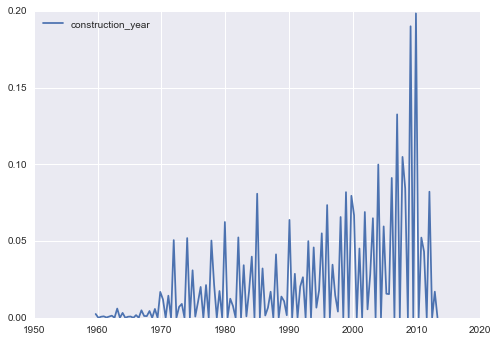

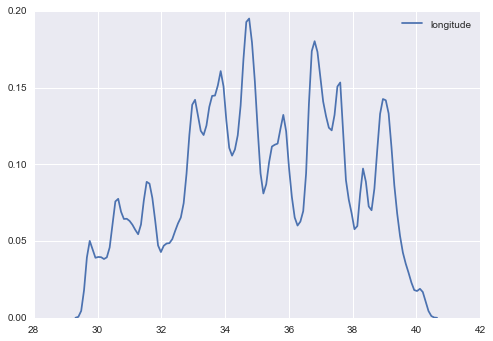

In [10]:
plot_data = df['construction_year']
plot_data = plot_data[plot_data != 0]
sns.kdeplot(plot_data, bw=0.1)
plt.show()

plot_data = df['longitude']
plot_data = plot_data[plot_data != 0]
sns.kdeplot(plot_data, bw=0.1)
plt.show()

## Paste for 'amount_tsh' and plot
## Paste for 'latitude' and plot

In [11]:
def kde_plot(dataframe, variable, upper=0.0, lower=0.0, bw=0.1):
    plot_data = dataframe[variable]
    plot_data = plot_data[(plot_data > lower) & (plot_data < upper)]
    sns.kdeplot(plot_data, bw=bw)
    plt.show()

/Users/bull/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


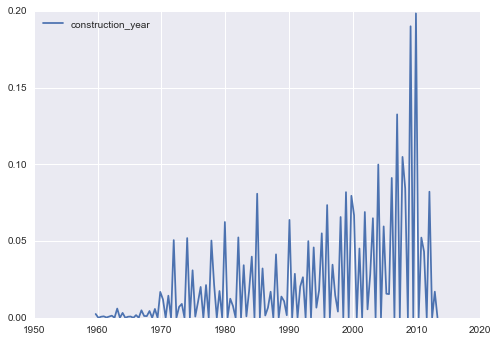

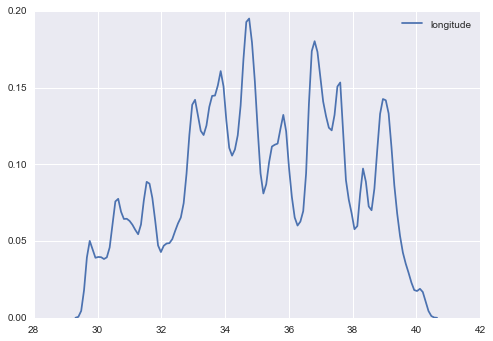

In [12]:
kde_plot(df, 'construction_year', upper=2016)
kde_plot(df, 'longitude', upper=42)

/Users/bull/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


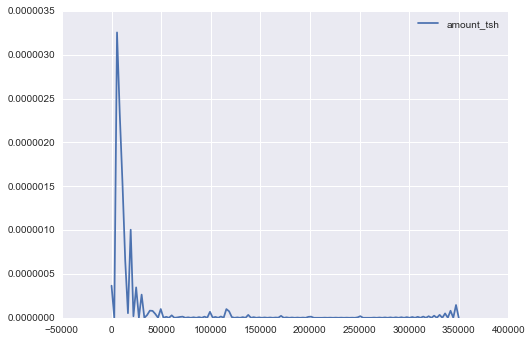

In [13]:
kde_plot(df, 'amount_tsh', upper=400000)

## 3.3 No more guess-and-check

Interrupt execution with:
 - `%debug` magic: drops you out into _the most recent error stacktrace_ in pdb
 - `import q;q.d()`: drops you into pdb, even outside of IPython
 
Interrupt execution on an Exception with `%pdb` magic. Use [pdb](https://docs.python.org/2/library/pdb.html) the Python debugger to debug inside a notebook.  Key commands for `pdb` are:

 - `p`: Evaluate and print Python code
 
 
 - `w`: Where in the stack trace am I?
 - `u`: Go up a frame in the stack trace.
 - `d`: Go down a frame in the stack trace.
 
 
 - `c`: Continue execution
 - `q`: Stop execution

In [ ]:
kde_plot(df, 'date_recorded')

In [ ]:
%debug

In [ ]:
# "1" turns pdb on, "0" turns pdb off
%pdb 1

kde_plot(df, 'date_recorded')

In [ ]:
# turn off debugger
%pdb 0

**`#lifehack`: %debug and %pdb are great, but pdb can be clunky. Try the 'q' module. Adding the line `import q;q.d()` anywhere in a project gives you a normal python console at that point. This is great if you're running outside of IPython. **

## 3.4 No more "Restart & Run All"

`assert` is the poor man's unit test: stops execution if condition is `False`, continues silently if `True`

In [ ]:
import numpy as np

In [ ]:
def gimme_the_mean(series):
    return np.mean(series)

assert gimme_the_mean([0.0]*10) == 0.0
assert gimme_the_mean(range(10)) == 5

## 3.5 No more copy-pasta between notebooks 

Have a method that gets used in multiple notebooks? Refactor it into a separate `.py` file so it can live a happy life!

Note: In order to import your local modules, you must do three things:

 - put the .py file in a separate folder
 - add an empty `__init__.py` file to the folder
 - add that folder to the Python path with `sys.path.append`

In [14]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
from preprocess.build_features import remove_invalid_data

df = remove_invalid_data("../data/water-pumps.csv")
df.shape

(11910, 39)

In [15]:
# TRY ADDING print "lalalala" to the method
df = remove_invalid_data("../data/water-pumps.csv")

Restart the kernel, let's try this again....

In [16]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport preprocess.build_features
from preprocess.build_features import remove_invalid_data

In [ ]:
df = remove_invalid_data("../data/water-pumps.csv")
df.head()

**`#lifehack`: reloading modules in a running kernel is tricky business. If you use `%autoreload` when developing, restart the kernel and run all cells when you're done. **

## 3.6 No more letting other people (including future you) break your toys

`unittest` is a unit testing framework that is built in to Python. See `src/preprocess/tests.py` for an example.

In [ ]:
%run ../src/preprocess/tests.py

**`#lifehack`: test your code. **

## 3.7 Special treats for datascience testing

### `numpy.testing`
Provides useful assertion methods for values that are numerically close and for numpy arrays.

In [ ]:
data = np.random.normal(0.0, 1.0, 1000000)
assert gimme_the_mean(data) == 0.0

In [ ]:
np.testing.assert_almost_equal(gimme_the_mean(data),
                               0.0,
                               decimal=1)

In [ ]:
a = np.random.normal(0, 0.0001, 10000)
b = np.random.normal(0, 0.0001, 10000)

np.testing.assert_array_equal(a, b)

In [ ]:
np.testing.assert_array_almost_equal(a, b, decimal=3)

### [engarde]() decorators

A new library that lets you practice defensive program--specifically with pandas `DataFrame` objects. It provides a set of decorators that check the return value of any function that returns a `DataFrame` and confirms that it conforms to the rules.

In [ ]:
import engarde.decorators as ed

In [ ]:
test_data = pd.DataFrame({'a': np.random.normal(0, 1, 100),
                          'b': np.random.normal(0, 1, 100)})

@ed.none_missing()
def process(dataframe):
    dataframe.loc[10, 'a'] = np.nan
    return dataframe

process(test_data).head()

`engarde` has an awesome set of decorators:

 - `none_missing` - no NaNs (great for machine learning--sklearn does not care for NaNs)
 - `has_dtypes` - make sure the dtypes are what you expect
 - `verify` - runs an arbitrary function on the dataframe
 - `verify_all` - makes sure every element returns true for a given function

More can be found [in the docs](http://engarde.readthedocs.org/en/latest/api.html).

**`#lifehack`: test your _data science_ code. **

## 3.8 Keep your secrets to yourself 

We've all seen secrets: passwords, database URLs, API keys checked in to GitHub. Don't do it! Even on a private repo. What's the easiest way to manage these secrets outside of source control? Store them as a `.env` file that lives in your repository, but is not in source control (e.g., add `.env` to your `.gitignore` file).

A package called `python-dotenv` manages this for you easily.

In [ ]:
!pip install -e git+https://github.com/pjbull/python-dotenv#egg=dotenv

In [ ]:
!cat ../.env

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

api_key = os.environ.get("API_KEY")
api_key

In [ ]:
import sys
frame_filename = sys._getframe().f_back.f_code.co_filename
frame_filename

In [ ]:
sys._getframe().f_code.co_filename# f_back.f_code.co_filename

# 4. Next-level code inspection

## 4.1 Code coverage

`coverage.py` is an _amazing_ tool for seeing what code gets executed when you run your test suite. You can 

In [ ]:
!coverage run --source ../src/ ../src/preprocess/tests.py
!coverage report

In [ ]:
!coverage html

from IPython.display import IFrame
IFrame("htmlcov/index.html", 800, 300)

## 4.2 Code profiling

Sometimes your code is slow. See which functions are called, how many times, and how long they take!

The `%prun` magic reports these to you right in the Jupyter notebook!

In [ ]:
import numpy as np
from mcmc.hamiltonian import hamiltonian, run_diagnostics

f = lambda X: np.exp(-100*(np.sqrt(X[:,1]**2 + X[:,0]**2)- 1)**2 + (X[:,0]-1)**3 - X[:,1] - 5)

# potential and kinetic energies
U = lambda q: -np.log(f(q))
K = lambda p: p.dot(p.T) / 2

# gradient of the potential energy
def grad_U(X):
    x, y = X[0,:]
    
    xy_sqrt = np.sqrt(y**2 + x**2)
    mid_term = 100*2*(xy_sqrt - 1) 
    grad_x = 3*((x-1)**2) - mid_term * ((x) / (xy_sqrt))
    grad_y = -1 - mid_term * ((y) / (xy_sqrt))
    
    return -1*np.array([grad_x, grad_y]).reshape(-1, 2)

ham_samples, H = hamiltonian(5000, U, K, grad_U)
run_diagnostics(ham_samples)

In [ ]:
%prun ham_samples, H = hamiltonian(5000, U, K, grad_U)
run_diagnostics(ham_samples)

## 4.3 The world beyond Jupyter

### Linting and Graphical Debugging (IDEs)

[PyCharm](https://www.jetbrains.com/pycharm/download/) is a fully-featured Python IDE. It has _tons_ of integrations with the normal development flow. The features I use most are:

 - `git` integration
 - interactive graphical debugger
 - flake8 linting
 - smart refactoring/go to